In [1]:
import pandas as pd
import numpy as np
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt

In [2]:
games_tourney=pd.read_csv('datasets_495447_920088_games_tourney.csv')
games_tourney_train=games_tourney[:3500]
games_tourney_test=games_tourney[3500:4200]
games_tourney_pred=games_tourney[4200:]
games_tourney_train.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [38]:
x=games_tourney_train[['seed_diff']]
y_regr=games_tourney_train[['score_diff']]
y_class=games_tourney_train[['won']]

In [39]:
input_tensor=Input((1,))
output_tensor_regr=Dense(1)(input_tensor)
output_tensor_class=Dense(1, activation='sigmoid')(output_tensor_regr)

In [40]:
model=Model(input_tensor,[output_tensor_regr,output_tensor_class])

In [41]:
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer='adam')

In [42]:
history=model.fit(x, [y_regr, y_class], epochs=150)

Epoch 1/150
110/110 [==============================] - 0s 619us/step - loss: 21.5107 - dense_8_loss: 16.2174 - dense_9_loss: 5.2933
Epoch 2/150
110/110 [==============================] - 0s 674us/step - loss: 19.9913 - dense_8_loss: 15.6946 - dense_9_loss: 4.2967
Epoch 3/150
110/110 [==============================] - 0s 628us/step - loss: 18.6371 - dense_8_loss: 15.1887 - dense_9_loss: 3.4483
Epoch 4/150
110/110 [==============================] - 0s 609us/step - loss: 17.4521 - dense_8_loss: 14.7050 - dense_9_loss: 2.7472
Epoch 5/150
110/110 [==============================] - 0s 597us/step - loss: 16.4347 - dense_8_loss: 14.2534 - dense_9_loss: 2.1813
Epoch 6/150
110/110 [==============================] - 0s 591us/step - loss: 15.5626 - dense_8_loss: 13.8261 - dense_9_loss: 1.7365
Epoch 7/150
110/110 [==============================] - 0s 571us/step - loss: 14.8222 - dense_8_loss: 13.4231 - dense_9_loss: 1.3991
Epoch 8/150
110/110 [==============================] - 0s 571us/step - loss:

In [43]:
model.get_weights()

[array([[1.2344221]], dtype=float32),
 array([0.05782232], dtype=float32),
 array([[0.14179283]], dtype=float32),
 array([-0.01255715], dtype=float32)]

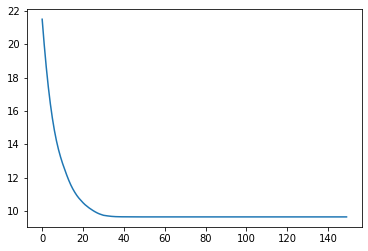

In [44]:
plt.plot(history.history['loss'])

In [45]:
x_test=games_tourney_test[['seed_diff']]
y_regr_test=games_tourney_test[['score_diff']]
y_class_test=games_tourney_test[['won']]

In [46]:
model.evaluate(x_test,[y_regr_test,y_class_test])

22/22 [==============================] - 0s 641us/step - loss: 10.0686 - dense_8_loss: 9.4823 - dense_9_loss: 0.5863


[10.068556785583496, 9.48228931427002, 0.5862674117088318]

In [47]:
x_pred=games_tourney_pred[['seed_diff']]
y_regr_pred=games_tourney_pred[['score_diff']]
y_class_pred=games_tourney_pred[['won']]

In [48]:
model.predict(x_pred)

[array([[ -3.645444  ],
        [ 16.10531   ],
        [ 18.574154  ],
        [ 18.574154  ],
        [  0.05782232],
        [ -3.645444  ],
        [-13.520821  ],
        [  1.2922444 ],
        [  8.698777  ],
        [  9.933199  ],
        [  0.05782232],
        [  6.229933  ],
        [  3.7610884 ],
        [  1.2922444 ],
        [ 11.167621  ],
        [-18.458508  ],
        [ -8.583133  ],
        [  1.2922444 ],
        [ -8.583133  ],
        [  1.2922444 ],
        [  0.05782232],
        [-11.051976  ],
        [  3.7610884 ],
        [ -1.1765997 ],
        [  3.7610884 ],
        [  9.933199  ],
        [ 11.167621  ],
        [  4.9955106 ],
        [  8.698777  ],
        [ -1.1765997 ],
        [ 11.167621  ],
        [  9.933199  ],
        [ 12.402043  ],
        [  6.229933  ]], dtype=float32),
 array([[0.37064403],
        [0.9064518 ],
        [0.9322088 ],
        [0.9322088 ],
        [0.4989104 ],
        [0.37064403],
        [0.12678236],
        [0.54

In [37]:
y_regr_pred=games_tourney_pred[['score_diff','won']]
y_regr_pred

,score_diff,won
4200,-8,0
4201,22,1
4202,39,1
4203,38,1
4204,-4,0
4205,-12,0
4206,-17,0
4207,11,1
4208,5,1
4209,4,1
